<a href="https://colab.research.google.com/github/Yuvaraj3970/Image_Classification-Machine_Learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

# Gathering data using bing

In [2]:
!pip install bing-image-downloader

time: 3.24 s (started: 2021-06-17 15:49:14 +00:00)


In [3]:
# Creating a directory
!mkdir images

time: 121 ms (started: 2021-06-17 15:49:21 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("Tigers", limit=30, output_dir="images", adult_filter_off=True)

In [ ]:
downloader.download("Old Trains", limit=30, output_dir="images", adult_filter_off=True)

In [ ]:
downloader.download("office chairs", limit=30, output_dir="images", adult_filter_off=True)

# Preprocessing

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

targets = []
images = []
flatten_data = []
datadir = '/content/images'
categories = ['Tigers','Old Trains','office chairs']

for cat in categories:
  nums = categories.index(cat)
  path = os.path.join(datadir,cat)
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))
    img_resized = resize(img_arr,(150,150,3))
    flatten_data.append(img_resized.flatten())
    images.append(img_resized)
    targets.append(nums)

flatten_data = np.array(flatten_data)
targets = np.array(targets)
images = np.array(images)

time: 31.7 s (started: 2021-06-17 15:53:05 +00:00)


<BarContainer object of 3 artists>

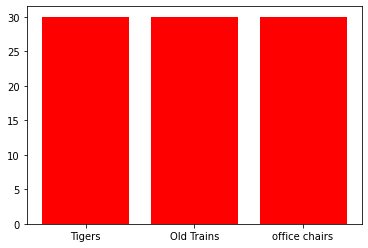

time: 170 ms (started: 2021-06-17 15:58:47 +00:00)


In [8]:
unique,count = np.unique(targets,return_counts=True)
plt.bar(categories,count,color='r')

# Hyperparameter Tuning

In [9]:
# Split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flatten_data,targets,test_size=0.25,random_state=109)

time: 18.7 ms (started: 2021-06-17 15:59:10 +00:00)


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C': [1,10,100,1000],'kernel':['linear'] },
              { 'C': [1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001],'kernel':['rbf'] }
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 3min 29s (started: 2021-06-17 16:07:20 +00:00)


In [22]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2,
       1])

time: 122 ms (started: 2021-06-17 16:11:24 +00:00)


In [23]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2])

time: 5.94 ms (started: 2021-06-17 16:11:30 +00:00)


# Evaluation 

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8260869565217391

time: 7.48 ms (started: 2021-06-17 16:11:40 +00:00)


In [26]:
confusion_matrix(y_pred,y_test)

array([[4, 1, 0],
       [1, 9, 2],
       [0, 0, 6]])

time: 4.74 ms (started: 2021-06-17 16:11:45 +00:00)


In [15]:
# Method 2
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)
# In this method, accuracy is not better than in SVM method

0.7391304347826086

time: 47.4 s (started: 2021-06-17 16:03:45 +00:00)


# Predict new image

In [29]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 68.3 ms (started: 2021-06-17 16:13:53 +00:00)


In [30]:
model = pickle.load(open('img_model.p','rb'))

time: 18.5 ms (started: 2021-06-17 16:13:56 +00:00)


Enter image URL from this categories(Tigers,Old Trains,Office Chairs)https://th.bing.com/th/id/OIP.xROU3i4i_3sG32ehhFrF6gHaEa?pid=ImgDet&rs=1
(282, 474, 3)
Predicted Output:Tigers


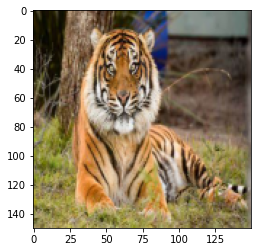

time: 4.36 s (started: 2021-06-17 16:23:29 +00:00)


In [34]:
# Testing Output
flatten_data = []
url = input('Enter image URL from this categories(Tigers,Old Trains,Office Chairs)')
img = imread(url)
print(img.shape)
img_resized = resize(img,(150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
print(f'Predicted Output:{y_out}')